# Convert EWX .json file to dataframe (or .csv)

### To Do: 
1. calculate heartbeat (length b/t time intervals) for every pred. year
2. get length of yearly forecasts (to confirm hourly intervals)

### Import libraries

In [19]:
%matplotlib notebook
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import json
import os
os.getcwd()

'C:\\Users\\wb5888\\Documents\\EWX'

In [20]:
filepath = 'C:\\Users\\wb5888\\Documents\\EWX'

def sortdir(filepath, num):
    os.chdir(filepath)
    files = np.array(os.listdir())
    time = []
    for file in files:
        sys_time = round(os.path.getmtime(filepath + "\\" + file))
        time.append(datetime.fromtimestamp(sys_time))

    time = np.array(time)
    lab = ['files']
    filedf = pd.DataFrame(files, columns = lab)

    filedf['time'] = time
    filedf = filedf.sort_values(by = 'time', axis = 0, ascending = False).reset_index(drop = True)

    print("files found in dir: ", filepath)
    print(filedf.head(num))
    return(filedf.head(num))

### Find downloaded .json file

In [21]:
filedf = sortdir(filepath, 5)

files found in dir:  C:\Users\wb5888\Documents\EWX
                                              files                time
0  20190829135604314000_NEPOOL_MECO_7561603019.json 2019-08-29 14:10:43
1                        NEPOOL_MECO_8958568019.csv 2019-08-29 14:07:33
2  20190829131602509000_NEPOOL_MECO_8958568019.json 2019-08-29 14:07:08
3  20190802102108150000_NEPOOL_MECO_8958568019.json 2019-08-29 13:12:40
4                        NEPOOL_MECO_1440866027.csv 2019-08-29 11:21:46


In [22]:
files = filedf.files[[0]]
files

0    20190829135604314000_NEPOOL_MECO_7561603019.json
Name: files, dtype: object

### Parse .json, save time & forecast values to dataframe

In [23]:
for f in files:
    forecasts = json_parse_csv(f)

#forecasts2 = json_parse_csv(filedf.files[1])

loading json...
found  1 reads, creating dataset.
found  1 reads, creating dataset.
                     t        v
0  2017-02-01 00:00:00  370.125
1  2017-02-01 01:00:00    365.4
2  2017-02-01 02:00:00  359.325
3  2017-02-01 03:00:00   353.25
4  2017-02-01 04:00:00    355.5
                         t        v
27802  2019-08-01 10:00:00  646.875
27803  2019-08-01 11:00:00   620.55
27804  2019-08-01 12:00:00  595.125
27805  2019-08-01 13:00:00    590.4
27806                  NaN      NaN
saving to dataframe...
writing file to csv


In [12]:
def json_parse_csv(file):
    
    with open(file) as raw:
        print("loading json...")
        data = json.load(raw) #raw json file
        acct = data['account'] #get account data
        ch3 = acct['timeseriesdataidr'] #dictionary of acct attributes
        n = len(ch3)
        
        reads = ch3[0]['reads']
        master_df = pd.DataFrame.from_dict(reads)
        
        print('found ', n, 'reads, creating dataset.')
        
        filename = file.split('_')[1:]
        filename = '_'.join(filename)
        filename = filename.replace('.json', '.csv')
        
        reads = ch3[0]['reads']
        master_df = pd.DataFrame.from_dict(reads)
        
        print('found ', n, 'reads, creating dataset.')
        
        for i in range(1,n):
            reads = ch3[i]['reads']
            temp = pd.DataFrame.from_dict(reads)
            
            tempname = "_".join([filename.split('.')[0], 'year', str(i), '.csv'])
            #print('writing {}'.format(tempname))
            
            #temp.to_csv(tempname, header = True, index = False)
            master_df = pd.concat([master_df, temp]).reset_index(drop = True)
        
        print(master_df.head())
        print(master_df.tail())
        
    
        print("saving to dataframe...")
    
    print('writing file to csv')
    master_df.to_csv(filename, sep = ",", header = True, index = False)
    return(master_df)

### Plot data

<IPython.core.display.Javascript object>


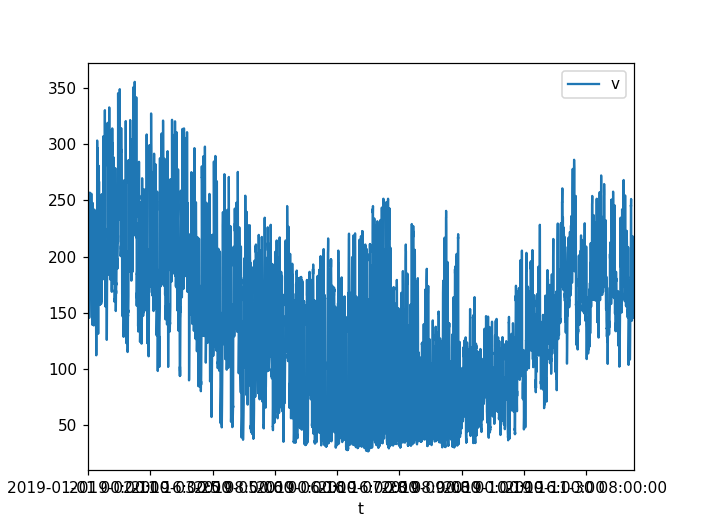

In [14]:
year = [int(string.split('-')[0]) for string in forecasts.t]
year_ind = [(date < 2020) for date in year]
forecasts.iloc[0:sum(year_ind),:] .plot(x = 't', y = 'v')

<IPython.core.display.Javascript object>


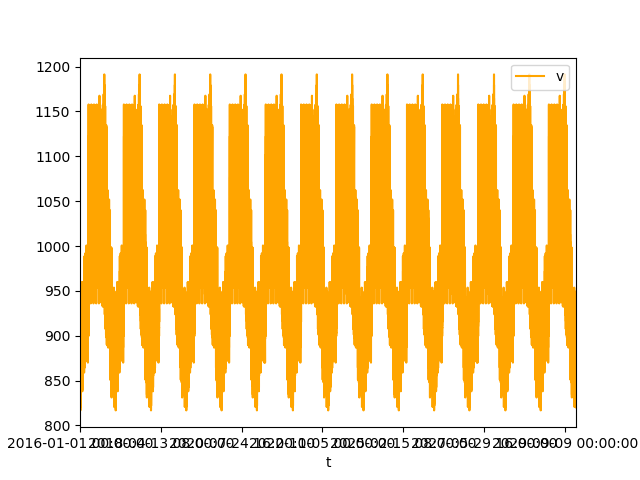

In [8]:
forecasts2.plot(x = 't', y = 'v', color = 'orange')

In [24]:
os.getcwd()
output = sortdir(filepath, 20)
file = output.files[1]
print('')
print('using file {}'.format(file))

files found in dir:  C:\Users\wb5888\Documents\EWX
                                                files                time
0                          NEPOOL_MECO_6276568002.csv 2019-06-11 10:06:17
1    20190610104203499000_NEPOOL_MECO_6276568002.json 2019-06-11 10:06:02
2                          NEPOOL_MECO_0061849009.csv 2019-06-11 10:05:37
3    20190610104100770000_NEPOOL_MECO_0061849009.json 2019-06-11 10:05:18
4                          NEPOOL_MECO_0327774014.csv 2019-06-11 09:08:06
5    20190610103204272000_NEPOOL_MECO_0327774014.json 2019-06-11 09:07:17
6   20190610141607180000_NEPOOL_CLP_51284553096_21... 2019-06-11 08:51:51
7   20190610141607180000_NEPOOL_CLP_51952842045_28... 2019-06-11 08:51:19
8   20190610141607212000_NEPOOL_CLP_51548334051_62... 2019-06-11 08:50:57
9   20190610141607009000_NEPOOL_CLP_51667526008_85... 2019-06-11 08:50:32
10  20190610141607056000_NEPOOL_CLP_51017512088_74... 2019-06-11 08:49:35
11                                   SBB_good_min.csv 2019-06

In [ ]:
with open(file) as raw:
        print("loading json...")
        data = json.load(raw) #raw json file
        acct = data['account'] #get account data
        ch3 = acct['timeseriesdataidr'] #dictionary of acct attributes
        n = len(ch3)
        
        filename = file.split('_')[1:]
        filename = '_'.join(filename)
        filename = filename.replace('.json', '.csv')
        
        reads = ch3[0]['reads']
        caps = pd.DataFrame.from_records(acct['captag'])
        caps.to_csv(''.join['CAP', filename])
        master_df = pd.DataFrame.from_dict(reads)
        
        print('found ', n, 'reads, creating dataset.')
        
        for i in range(1,n):
            reads = ch3[i]['reads']
            temp = pd.DataFrame.from_dict(reads)
            filename = "_".join([acct, 'year', str(i), '.json'])
            temp.to_csv(filename, header = True, index = False)
            master_df = pd.concat([master_df, temp]).reset_index(drop = True)
        
        print(master_df.head())
        print(master_df.tail())
        
    
        print("saving to dataframe...")
    
    mastername = filename.split('.')[0]
    mastername = '_'.join([filename, 'master.json'])

    print('writing file to csv')
    master_df.to_csv(filename, sep = ",", header = True, index = False)
    return(master_df)

In [41]:
for k, v in acct.items():
    print(k)
    print(len(v))

status
17
timeseriesdataidr
12
tpt
0
stats
10
captag
3
accountnumber
10
discocode
4
profileclass
3
metertype
3
market
6


In [28]:
caps = pd.DataFrame.from_records(acct['captag'])

,start,stop,sv,v
0,2019-06-01 00:00:00,2020-05-31 23:59:59,S,299.079
1,2020-06-01 00:00:00,2021-05-31 23:59:59,S,299.079
2,2021-06-01 00:00:00,2031-05-31 23:59:59,S,299.079


In [53]:
output.files[4]

'NEPOOL_MECO_8789195006.csv'

In [44]:
file.split('_')[1:]

['NEPOOL', 'MECO', '6276568002.json']